*Link Vídeo*


# Questão 1 - Predição de Pagamento de Empréstimos


Base de dados já separada entre Treino e Teste, com 1500 linhas de Treino e 577 linhas de Teste.

São 12 atributos, sendo 7 numéricos e 5 categóricos.




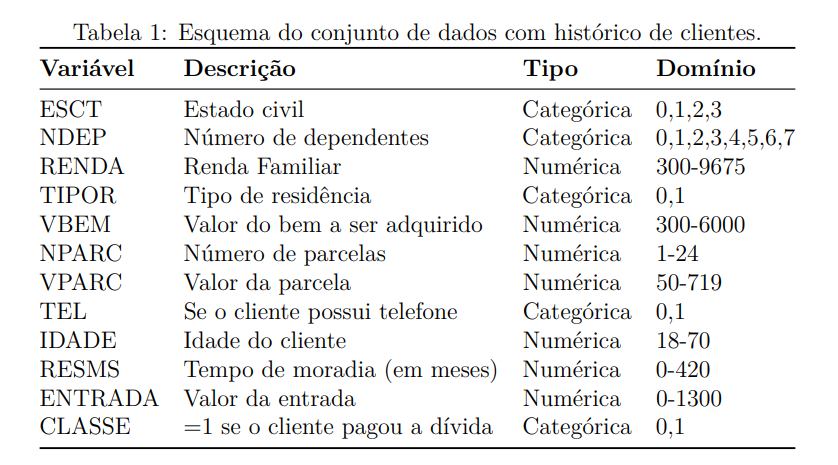

**Importing Necessary Packages**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

**Creating the DataFrame**

In [2]:
# Nomeando as colunas
nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

# Ajustando os dados de treino e de teste
data_train = pd.read_csv('./data/credtrain.txt', sep = '\t', header = None, names = nomes_colunas)
data_test = pd.read_csv('./data/credtest.txt', sep = '\t', header = None, names = nomes_colunas)

**Checking the DataFrame**

In [9]:
# Testando o tamanho do DataFrame
print(data_train.shape, data_test.shape)

(1500, 12) (577, 12)


In [11]:
# Testando se tem Nulos
data_train.isnull().sum().sum(), data_test.isnull().sum().sum()

(0, 0)

In [12]:
#Visualizando melhor os dados de Treino
data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [14]:
# Checando se as classes estão balanceadas no Treino

class_division = [ data_train[data_train['CLASSE'] == 1 ].shape[0], data_train[data_train['CLASSE'] == 0 ].shape[0] ]
my_labels = ['Pagantes', 'Não Pagantes']

print("Proporção de Pagantes: " + str(round(data_train[data_train['CLASSE'] == 1 ].shape[0]/data_train.shape[0] * 100, 2)) + "%")

Proporção de Pagantes: 47.67%


In [16]:
# Checando se as classes estão balanceadas no Teste

class_division = [ data_test[data_test['CLASSE'] == 1 ].shape[0], data_test[data_test['CLASSE'] == 0 ].shape[0] ]
my_labels = ['Pagantes', 'Não Pagantes']

print("Proporção de Pagantes: " + str(round(data_test[data_test['CLASSE'] == 1 ].shape[0]/data_test.shape[0] * 100, 2)) + "%")

Proporção de Pagantes: 46.97%


**Data Processing**

Como existem atributos categóricos e numéricos, é necessário tratar os atributos categóricos antes de rodar o modelo. No caso do dataset, a maioria dos atributos categóricos variam entre 0 e 1, com exceção de 'ESCT' e 'NDEP'. 'NDEP' representa o número de dependentes, tendo uma noção de ordem/grandeza. 'ESCT', no entanto, varia de 0 a 3, mas não apresenta a mesma relação. Por isso, vamos transformar a coluna 'ESCT' em variáveis dummy.

In [13]:
# Aplicando one-hot-encoding
data_train = pd.get_dummies(data_train, columns = ['ESCT'])
data_test = pd.get_dummies(data_test, columns = ['ESCT']) 

In [17]:
# Separando variáveis categóricas das variáveis numéricas

num = ['RENDA', 'VBEM', 'NPARC', 'VPARC', 'IDADE', 'RESMS', 'ENTRADA']
cat = ['ESCT_0', 'ESCT_1', 'ESCT_2', 'ESCT_3', 'NDEP', 'TIPOR', 'TEL']

# Aplicando a separação nos conjuntos de treino e teste

X_train_num = data_train[num]
X_train_cat = data_train[cat] # Já está com One-Hot-Encoding 
y_train = data_train['CLASSE'] # Definindo CLASSE como o y do treino

X_test_num = data_test[num]
X_test_cat = data_test[cat] # Já está com One-Hot-Encoding 
y_test = data_test['CLASSE'] # Definindo CLASSE como o y do teste

In [19]:
# Normalizando os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_normalized = scaler.fit_transform(X_train_num)
X_test_num_normalized = scaler.transform(X_test_num)

In [20]:
# Concatenando as variáveis

X_train = np.concatenate((X_train_num_normalized, X_train_cat), axis=1)
X_test = np.concatenate((X_test_num_normalized, X_test_cat), axis=1)

**Building the Models**

In [21]:
# Importando as classes do scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Listando os modelos

LR = LogisticRegression()
LR.fit(X_train, y_train)

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)


*Logistic Regression*


Logistic Regression - Resultados


Relatório de Classificação

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       306
           1       0.93      0.82      0.87       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.89      0.89      0.89       577


Matriz de Confusão



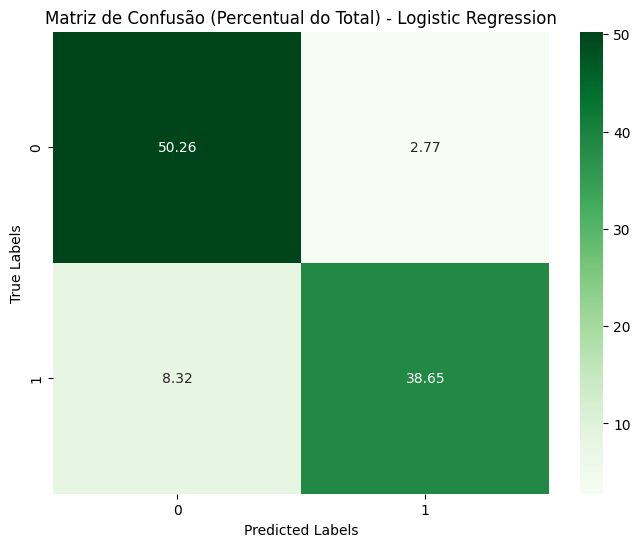

In [41]:
# Logistic Regression

y_pred_lr = LR.predict(X_test)
matriz_confusao_lr = confusion_matrix(y_test, y_pred_lr)

# Calculando a matriz de confusão por percentuais
total_amostras = len(y_test)
matriz_percentual_lr = (matriz_confusao_lr / total_amostras) * 100  # Dividindo pelo total e multiplicando por 100

# Resultados

print('\nLogistic Regression - Resultados\n')
print('\nRelatório de Classificação\n')
print(classification_report(y_test, y_pred_lr))
print('\nMatriz de Confusão\n')

# Plotar a matriz de confusão como percentuais usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_percentual_lr, annot = True, fmt = '.2f', cmap = 'Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusão (Percentual do Total) - Logistic Regression')
plt.show()

*Decision Tree*


Decision Tree - Resultados


Relatório de Classificação

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       306
           1       0.84      0.86      0.85       271

    accuracy                           0.86       577
   macro avg       0.86      0.86      0.86       577
weighted avg       0.86      0.86      0.86       577


Matriz de Confusão



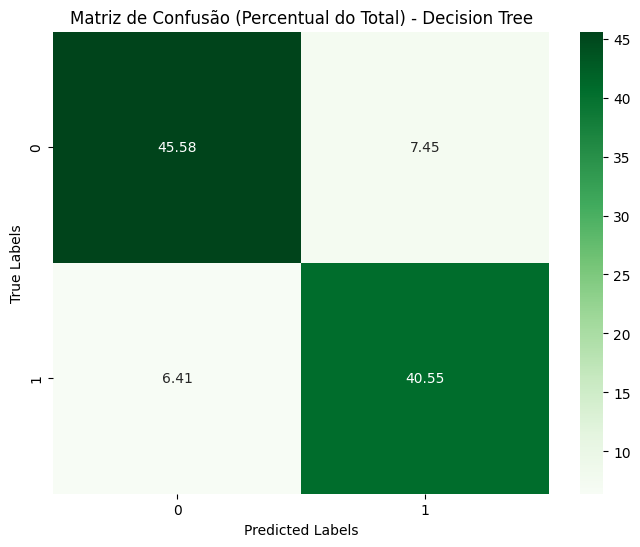

In [42]:
# Decision Tree

y_pred_dt = DT.predict(X_test)
matriz_confusao_dt = confusion_matrix(y_test, y_pred_dt)

# Calculando a matriz de confusão por percentuais
total_amostras = len(y_test)
matriz_percentual_dt = (matriz_confusao_dt / total_amostras) * 100  # Dividindo pelo total e multiplicando por 100

# Resultados

print('\nDecision Tree - Resultados\n')
print('\nRelatório de Classificação\n')
print(classification_report(y_test, y_pred_dt))
print('\nMatriz de Confusão\n')

# Plotar a matriz de confusão como percentuais usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_percentual_dt, annot = True, fmt = '.2f', cmap = 'Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusão (Percentual do Total) - Decision Tree')
plt.show()

*Random Forest*


Random Forest - Resultados


Relatório de Classificação

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       306
           1       0.94      0.83      0.88       271

    accuracy                           0.90       577
   macro avg       0.90      0.89      0.90       577
weighted avg       0.90      0.90      0.90       577


Matriz de Confusão



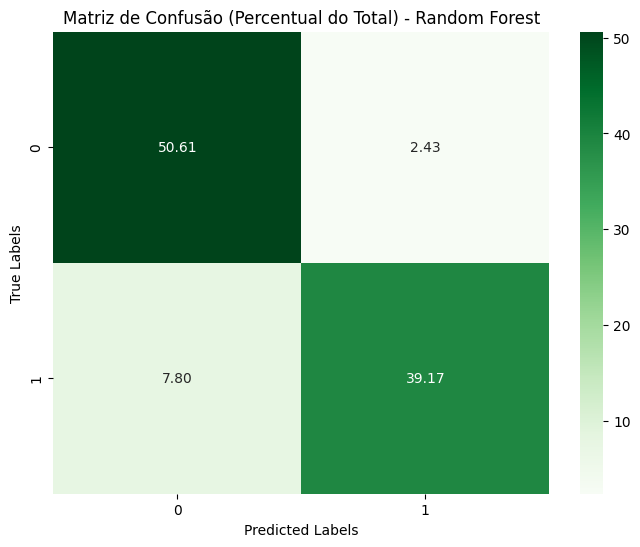

In [43]:
# Random Forest

y_pred_rf = RF.predict(X_test)
matriz_confusao_rf = confusion_matrix(y_test, y_pred_rf)

# Calculando a matriz de confusão por percentuais
total_amostras = len(y_test)
matriz_percentual_rf = (matriz_confusao_rf / total_amostras) * 100  # Dividindo pelo total e multiplicando por 100

# Resultados

print('\nRandom Forest - Resultados\n')
print('\nRelatório de Classificação\n')
print(classification_report(y_test, y_pred_rf))
print('\nMatriz de Confusão\n')

# Plotar a matriz de confusão como percentuais usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_percentual_rf, annot = True, fmt = '.2f', cmap = 'Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusão (Percentual do Total) - Random Forest')
plt.show()

*KNN*


KNN - Resultados


Relatório de Classificação

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       306
           1       0.90      0.79      0.84       271

    accuracy                           0.86       577
   macro avg       0.86      0.86      0.86       577
weighted avg       0.86      0.86      0.86       577


Matriz de Confusão



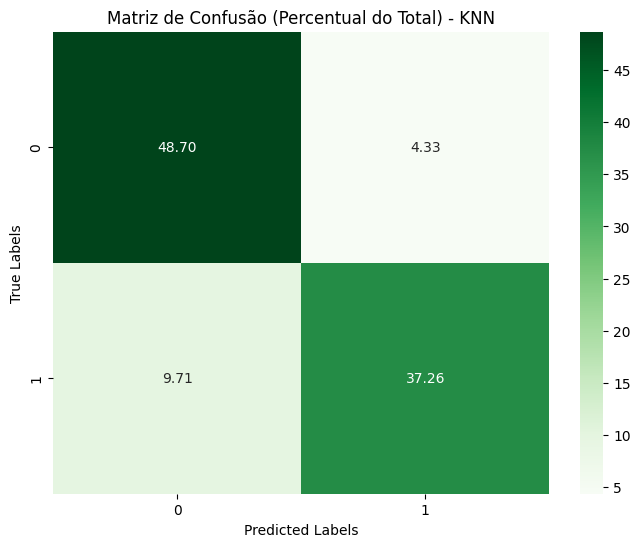

In [44]:
# KNN

y_pred_knn = KNN.predict(X_test)
matriz_confusao_knn = confusion_matrix(y_test, y_pred_knn)

# Calculando a matriz de confusão por percentuais
total_amostras = len(y_test)
matriz_percentual_knn = (matriz_confusao_knn / total_amostras) * 100  # Dividindo pelo total e multiplicando por 100

# Resultados

print('\nKNN - Resultados\n')
print('\nRelatório de Classificação\n')
print(classification_report(y_test, y_pred_knn))
print('\nMatriz de Confusão\n')

# Plotar a matriz de confusão como percentuais usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_percentual_knn, annot = True, fmt = '.2f', cmap = 'Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusão (Percentual do Total) - KNN')
plt.show()

*Gradient Boosting*


Gradient Boost - Resultados


Relatório de Classificação

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       306
           1       0.96      0.83      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577


Matriz de Confusão



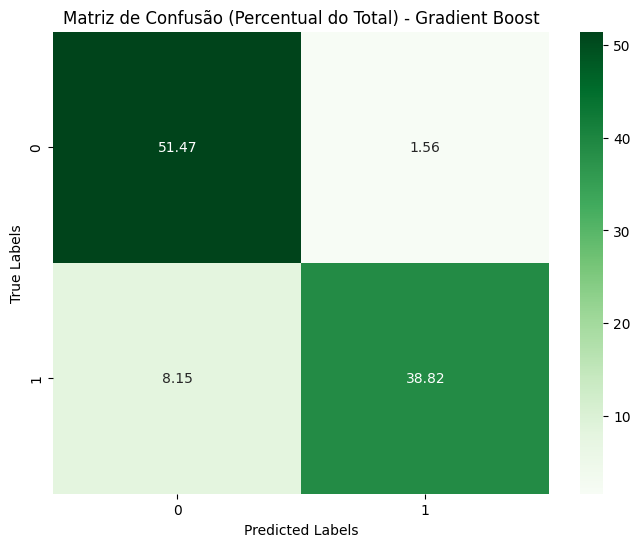

In [45]:
# Gradient Boosting

y_pred_gb = GB.predict(X_test)
matriz_confusao_gb = confusion_matrix(y_test, y_pred_gb)

# Calculando a matriz de confusão por percentuais
total_amostras = len(y_test)
matriz_percentual_gb = (matriz_confusao_gb / total_amostras) * 100  # Dividindo pelo total e multiplicando por 100

# Resultados

print('\nGradient Boost - Resultados\n')
print('\nRelatório de Classificação\n')
print(classification_report(y_test, y_pred_gb))
print('\nMatriz de Confusão\n')

# Plotar a matriz de confusão como percentuais usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_percentual_gb, annot = True, fmt = '.2f', cmap = 'Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusão (Percentual do Total) - Gradient Boost')
plt.show()